In [6]:
import requests

# Zadanie 3

Find all meanings of the szkoda noun and display all their synonyms.

In [3]:
word = 'szkoda'
part_of_speech = 'noun'

In [24]:
res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/lexemes/{}'.format(word))
senses_id = []
for sense in res.json():
    if sense['part_of_speech'] == 'noun_pl':
        senses_id.append(sense['sense_id'])
        res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/senses/{}'.format(senses_id[0]))
        for homograph in res.json()['homographs']:
            if homograph['id'] != senses_id[0]:
                senses_id.append(homograph['id'])
                break
        break
        
for sense_id in senses_id:
    res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/senses/{}'.format(sense_id))

{'id': '80624c96-5d15-11e9-bb74-eb518436f10c',
 'lemma': 'szkoda',
 'sense_index': 2,
 'language': 'pl_PL',
 'project': 1,
 'domain_id': 18,
 'part_of_speech': 'noun_pl',
 'definition': None,
 'synset_id': 'a2924e20-5d14-11e9-86e5-ff2217e9fc70',
 'synset_external_id': 3675,
 'lexicon': 'Słowosieć',
 'homographs': [{'id': '8061a7c8-5d15-11e9-bb72-0b543675d8e2',
   'lemma': 'szkoda',
   'sense_index': 1,
   'language': 'pl_PL',
   'project': 1,
   'domain_id': 12,
   'part_of_speech': 'noun_pl',
   'definition': 'miejsce w polu lub ogrodzie, gdzie zwierzęta (np. drób, bydło) zniszczyły plony',
   'synset_id': 'a451885c-5d14-11e9-8ebb-0b6b7f1f029b',
   'synset_external_id': 6533,
   'lexicon': 'Słowosieć'},
  {'id': '80624c96-5d15-11e9-bb74-eb518436f10c',
   'lemma': 'szkoda',
   'sense_index': 2,
   'language': 'pl_PL',
   'project': 1,
   'domain_id': 18,
   'part_of_speech': 'noun_pl',
   'definition': None,
   'synset_id': 'a2924e20-5d14-11e9-86e5-ff2217e9fc70',
   'synset_external_id

Znaczenia szkoda:
    1. szkoda 1 - miejsce w polu lub ogrodzie, gdzie zwierzęta (np. drób, bydło) zniszczyły plony
    2. szkoda 2
        * strata 1
        * utrata 1
        * uszczerbek 1

# Zadanie 4

Find closure of hypernymy relation for the first meaning of the wypadek drogowy expression. Create diagram of the relations as a directed graph.

In [36]:
word = 'wypadek drogowy'
res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/lexemes/{}'.format(word))
sense_id = res.json()[0]['sense_id']

res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/hyponyms/{}'.format(sense_id))
result = ''
for lemma in res.json()[0]:
    if result != '':
        result += ' -> '
    result += lemma['lemma']
result
        

'wydarzenie -> zdarzenie oceniane negatywnie -> wypadek -> wypadek komunikacyjny -> wypadek drogowy'

# Zadanie 5

Find direct hyponyms of wypadek 1 noun.

In [45]:
word = 'wypadek'
res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/lexemes/{}'.format(word))
sense_id = res.json()[0]['sense_id']
res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/senses/{}'.format(sense_id))
res.json()
result = []
ids = []
for relation in res.json()['outgoing']:
    if relation['relation_id'] == 10:
        for lemma in relation['senses']:
            result.append(lemma['lemma'])
            ids.append(lemma['id'])
        break
result

['zderzenie',
 'kolizja',
 'karambol',
 'zawał',
 'tąpnięcie',
 'kapotaż',
 'wykolejenie',
 'zakrztuszenie',
 'wypadek komunikacyjny',
 'katastrofa budowlana',
 'wypadek jądrowy']

# Zadanie 6

Find second-order hyponyms of the same noun.

In [50]:
second_order = []
first_order = []
for sense, name in zip(ids, result):
    res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/senses/{}'.format(sense))
    for relation in res.json()['outgoing']:
        if relation['relation_id'] == 10:
            first_order.append(name)
            tmp = []
            for lemma in relation['senses']:
                tmp.append(lemma['lemma'])
            second_order.append(tmp)
            break
for name, name_list in zip(first_order, second_order):
    print(name + ': ')
    print(name_list)


zderzenie: 
['czołówka', 'stłuczka', 'dzwon']
kolizja: 
['kolizja drogowa']
zawał: 
['obwał']
wypadek komunikacyjny: 
['wypadek drogowy']


# Zadanie 7

Display as a directed graph (with labels for the edges) semantic relations between the following groups of lexemes: 

szkoda2, strata1, uszczerbek1, szkoda majątkowa1, uszczerbek na zdrowiu1, krzywda1, niesprawiedliwość1, nieszczęście2.

wypadek1, wypadek komunikacyjny1, kolizja2, zderzenie2, kolizja drogowa1, bezkolizyjny2, katastrofa budowlana1, wypadek drogowy1.

In [85]:
words = [('szkoda', 2), ('strata', 1), ('uszczerbek', 1), ('szkoda majątkowa', 1), ('uszczerbek na zdrowiu', 1), 
        ('krzywda', 1), ('niesprawiedliwość', 1), ('nieszczęście', 2)]

In [94]:
def search_for_relation(word1, sense1, word2, sense2):
    res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/lexemes/{}'.format(word1))
    sense_id = -1
    for sense in res.json():
        if (sense['part_of_speech'] == 'noun_pl' or sense['part_of_speech'] == 'adjective_pl') and sense['lemma'] == word1:
            sense_id = sense['sense_id']
    res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/senses/{}'.format(sense_id))
    for homograph in res.json()['homographs']:
        if homograph['sense_index'] == sense1:
            sense_id = homograph['id']
            break

    res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/senses/{}'.format(sense_id))
    for relation in res.json()['outgoing']:
        relation_id = relation['relation_id']
        for lemma in relation['senses']:
            if lemma['lemma'] == word2 and lemma['sense_index'] == sense2:
                return relation_id
    for sense in res.json()['synset']['senses']:
        if sense['lemma'] == word2 and lemma['sense_index'] == sense2:
            return 'synonim'
    return ''

In [86]:
import itertools
for word1, word2 in itertools.product(words, repeat=2):
    if word1 != word2:
        relation = search_for_relation(word1[0], word1[1], word2[0], word2[1])
        if relation == 10:
            relation = 'hiponim'
        if relation == 59:
            relation = 'derywacyjność'
        if relation != '':
            print(word1, word2, relation)


('szkoda', 2) ('strata', 1) synonim
('szkoda', 2) ('uszczerbek', 1) synonim
('szkoda', 2) ('szkoda majątkowa', 1) hyponym
('szkoda', 2) ('uszczerbek na zdrowiu', 1) hyponym
('szkoda', 2) ('krzywda', 1) hyponym
('strata', 1) ('uszczerbek', 1) synonim
('strata', 1) ('szkoda majątkowa', 1) hyponym
('strata', 1) ('uszczerbek na zdrowiu', 1) hyponym
('strata', 1) ('krzywda', 1) hyponym
('uszczerbek', 1) ('strata', 1) synonim
('uszczerbek', 1) ('szkoda majątkowa', 1) hyponym
('uszczerbek', 1) ('uszczerbek na zdrowiu', 1) hyponym
('uszczerbek', 1) ('krzywda', 1) hyponym
('krzywda', 1) ('niesprawiedliwość', 1) synonim
('niesprawiedliwość', 1) ('krzywda', 1) synonim
('nieszczęście', 2) ('krzywda', 1) hyponym


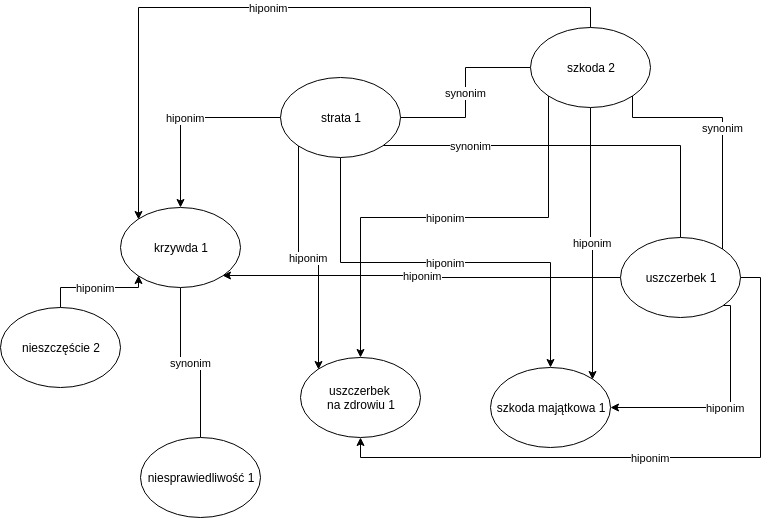

In [87]:
words2 = [('wypadek', 1), ('wypadek komunikacyjny', 1), ('kolizja', 2), ('zderzenie', 2), ('kolizja drogowa', 1),
        ('bezkolizyjny', 2), ('katastrofa budowlana', 1), ('wypadek drogowy', 1)]

In [96]:
import itertools
for word1, word2 in itertools.product(words2, repeat=2):
    if word1 != word2:
        relation = search_for_relation(word1[0], word1[1], word2[0], word2[1])
        if relation == 10:
            relation = 'hyponym'
        if relation != '':
            print(word1, word2, relation)

('wypadek', 1) ('wypadek komunikacyjny', 1) hyponym
('wypadek', 1) ('kolizja', 2) hyponym
('wypadek', 1) ('zderzenie', 2) hyponym
('wypadek', 1) ('katastrofa budowlana', 1) hyponym
('wypadek komunikacyjny', 1) ('wypadek drogowy', 1) hyponym
('kolizja', 2) ('kolizja drogowa', 1) hyponym
('kolizja', 2) ('bezkolizyjny', 2) 59


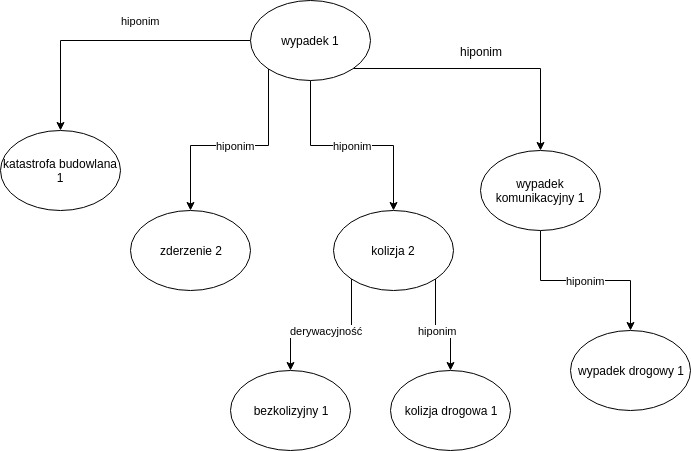

# Zadanie 8

Find the value of Leacock-Chodorow semantic similarity measure between following pairs of lexemes:

szkoda2 - wypadek1,

kolizja2 - szkoda majątkowa1,

nieszczęście2 - katastrofa budowlana1

In [4]:
words1 = [('szkoda', 2), ('wypadek', 1)]
words2 = [('kolizja', 2), ('szkoda majątkowa', 1)]
words3 = [('nieszczęście', 2), ('katastrofa budowlana', 1)]

In [3]:
def find_path(word1, sense1):
    res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/lexemes/{}'.format(word1))
    sense_id = -1
    for sense in res.json():
        if sense['part_of_speech'] == 'noun_pl' and sense['lemma'] == word1:
            sense_id = sense['sense_id']
    res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/senses/{}'.format(sense_id))
    for homograph in res.json()['homographs']:
        if homograph['sense_index'] == sense1:
            sense_id = homograph['id']

    res = requests.get('http://plwordnet.pwr.wroc.pl/wordnet/api/hyponyms/{}'.format(sense_id))
    result = ''
    for lemmas in res.json():
        for lemma in lemmas:
            if result != '':
                result += ' -> '
            result += lemma['lemma'] + ' ' + str(lemma['sense_index'])
        print(result)
        result = ''

In [1]:
import math
def measure(value):
    depth = 35
    result = - math.log((value) / (2.0 * depth))
    return result

In [7]:
find_path(words1[0][0], words1[0][1])
print(' ')
find_path(words1[1][0], words1[1][1])
value = 3
measure(value)

wydarzenie 1 -> zdarzenie oceniane negatywnie 1 -> niepowodzenie 1 -> strata 1
właściwość 1 -> cecha zbioru 1 -> cecha jednostek w zbiorze 1 -> różnica 1 -> ubytek 4 -> strata 1
 
wydarzenie 1 -> zdarzenie oceniane negatywnie 1 -> wypadek 1


3.1498829533812494

In [8]:
find_path(words2[0][0], words2[0][1])
print(' ')
find_path(words2[1][0], words2[1][1])
value = 5
measure(value)

wydarzenie 1 -> zdarzenie oceniane negatywnie 1 -> wypadek 1 -> kolizja 2
 
wydarzenie 1 -> zdarzenie oceniane negatywnie 1 -> niepowodzenie 1 -> strata 1 -> szkoda majątkowa 1
właściwość 1 -> cecha zbioru 1 -> cecha jednostek w zbiorze 1 -> różnica 1 -> ubytek 4 -> strata 1 -> szkoda majątkowa 1


2.639057329615259

In [9]:
find_path(words3[0][0], words3[0][1])
print(' ')
find_path(words3[1][0], words3[1][1])
value = 8
measure(value)

właściwość 1 -> wartość 2 -> jakość 2 -> negatywność 1 -> zło 1 -> nieszczęście 2
rzecz 6 -> rzecz oceniana negatywnie 1 -> zło 1 -> nieszczęście 2
 
wydarzenie 1 -> zdarzenie oceniane negatywnie 1 -> wypadek 1 -> katastrofa budowlana 1


2.169053700369523